Read data

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 读数据函数
# testee为被测试者代号 有arc ctj lky
# dType为数据类型 有Mag和Phase

def ReadData(testee, dType, fileNum):
    dataList = list()
    for i in range(0, fileNum):
        fileName = 'D' + str(i)
        pathName = 'data/' + testee + '/' + dType + '/' + fileName + '.csv'
        data = pd.read_csv(pathName, header = None)
        dataList.append(data)
    #print(len(dataList))
    #print(dataList[50])
    return dataList

In [3]:
arcMag = ReadData('arc', 'Mag', 351)
ctjMag = ReadData('ctj', 'Mag', 162)
lkyMag = ReadData('lky', 'Mag', 350)

In [4]:
pd.DataFrame(np.array(arcMag[0])[:10,:13])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,115.0043,123.4382,115.5206,142.4675,197.4968,112.2185,109.3435,172.1046,105.0048,124.4267,147.5669,128.7245,119.1512
1,115.1217,121.0785,118.2074,146.6322,199.9225,118.0889,99.0051,165.7468,105.6030,124.8079,150.9603,118.3427,120.9669
2,118.3427,113.3181,123.7457,148.2228,199.6998,113.0398,99.8248,167.6305,107.4244,129.2478,154.4668,125.4193,123.4058
3,117.0684,109.5628,117.0043,145.0965,186.9679,110.3449,105.1713,161.1118,108.8118,125.9921,146.0856,123.9677,120.2082
4,119.0168,120.3079,124.4829,146.6970,187.6086,106.7052,107.8147,157.2005,109.6038,132.3707,153.6001,122.6418,122.2497
5,124.1934,125.2278,126.3962,147.1394,195.5633,110.1363,111.5437,163.6246,118.2286,136.4588,156.5184,130.6981,128.0156
6,149.5627,147.1768,153.2221,174.8657,216.0023,123.3694,133.4054,186.4001,136.7808,164.1250,181.1767,151.0132,151.2217
7,166.3731,165.2453,167.7260,191.2302,232.3812,140.5774,147.4924,204.5189,151.0132,182.5431,197.9520,166.5443,169.3665
8,173.7700,170.4699,175.0714,196.2371,228.1622,134.3317,154.8709,199.2486,158.7010,190.5886,204.9244,173.8994,174.0029
9,172.7339,165.6563,174.3474,190.8507,206.2062,122.2620,153.3101,192.6759,155.9295,186.7030,198.4364,170.6283,173.6692


Data pre-processing

In [5]:
# 求最小列数的函数
def minLine(dataName):
    l = len(dataName)
    #print(l)
    minl = dataName[0].shape[1]
    for i in range(1, l):
        l2 = dataName[i].shape[1]
        if l2 < minl:
            minl = l2
    return minl

In [6]:
arcMinLine = minLine(arcMag)
print('The minimum number of the columns is: ' + str(arcMinLine))
ctjMinLine = minLine(ctjMag)
print('The minimum number of the columns is: ' + str(ctjMinLine))
lkyMinLine = minLine(lkyMag)
print('The minimum number of the columns is: ' + str(lkyMinLine))

The minimum number of the columns is: 440
The minimum number of the columns is: 515
The minimum number of the columns is: 487


In [7]:
import matplotlib.pyplot as plt

In [8]:
# 绘图前的分类准备函数
# 将数据按照列数多少分成五类
# 分别是 <450 450～475 475～500 500～525 525～550

def graphPlotPre(dataName):
    l = len(dataName)
    sum450 = 0
    sum475 = 0
    sum500 = 0
    sum525 = 0
    sum550 = 0
    for i in range(0, l):
        rowL = dataName[i].shape[1]
        if rowL <= 450:
            sum450 += 1
        elif rowL <= 475:
            sum475 += 1
        elif rowL <= 500:
            sum500 += 1
        elif rowL <= 520:
            sum525 += 1
        else:
            sum550 += 1
    sumRow = [sum450, sum475, sum500, sum525, sum550]
    return sumRow

In [9]:
arcRow = graphPlotPre(arcMag)
print(arcRow)
ctjRow = graphPlotPre(ctjMag)
print(ctjRow)
lkyRow = graphPlotPre(lkyMag)
print(lkyRow)

[1, 3, 7, 59, 281]
[0, 0, 0, 4, 158]
[0, 0, 28, 172, 150]


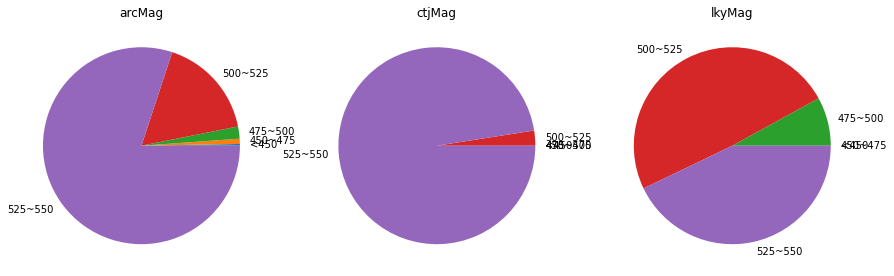

In [10]:
# 绘制饼图
plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.pie(arcRow, labels = ['<450', '450~475', '475~500', '500~525', '525~550'])
plt.title("arcMag")

plt.subplot(1, 3, 2)
plt.pie(ctjRow, labels = ['<450', '450~475', '475~500', '500~525', '525~550'])
plt.title("ctjMag")

plt.subplot(1, 3, 3)
plt.pie(lkyRow, labels = ['<450', '450~475', '475~500', '500~525', '525~550'])
plt.title("lkyMag")

#plt.suptitle("Pie Chart by Column Number", fontsize = 12)
plt.show()

In [11]:
# 先删除不足500列的数据
# 再把剩余数据中多余的部分截去

dataMag = list()

def dataMagPre(dataName):
    l = len(dataName)
    for i in range(0, l):
        rowL = dataName[i].shape[1]
        if rowL < 500:
            continue
        else:
            temp = np.array(dataName[i])[:,:500]
            dataMag.append(temp)
    

In [12]:
dataMagPre(arcMag)
print('Number of class arc : ', len(dataMag))
dataMagPre(ctjMag)
print('Number of class arc + ctj : ', len(dataMag))
dataMagPre(lkyMag)
print('Number of class arc + ctj + lky : ', len(dataMag))

Number of class arc :  341
Number of class arc + ctj :  503
Number of class arc + ctj + lky :  831


In [13]:
pd.DataFrame(dataMag[0][:10,:13])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,115.0043,123.4382,115.5206,142.4675,197.4968,112.2185,109.3435,172.1046,105.0048,124.4267,147.5669,128.7245,119.1512
1,115.1217,121.0785,118.2074,146.6322,199.9225,118.0889,99.0051,165.7468,105.6030,124.8079,150.9603,118.3427,120.9669
2,118.3427,113.3181,123.7457,148.2228,199.6998,113.0398,99.8248,167.6305,107.4244,129.2478,154.4668,125.4193,123.4058
3,117.0684,109.5628,117.0043,145.0965,186.9679,110.3449,105.1713,161.1118,108.8118,125.9921,146.0856,123.9677,120.2082
4,119.0168,120.3079,124.4829,146.6970,187.6086,106.7052,107.8147,157.2005,109.6038,132.3707,153.6001,122.6418,122.2497
5,124.1934,125.2278,126.3962,147.1394,195.5633,110.1363,111.5437,163.6246,118.2286,136.4588,156.5184,130.6981,128.0156
6,149.5627,147.1768,153.2221,174.8657,216.0023,123.3694,133.4054,186.4001,136.7808,164.1250,181.1767,151.0132,151.2217
7,166.3731,165.2453,167.7260,191.2302,232.3812,140.5774,147.4924,204.5189,151.0132,182.5431,197.9520,166.5443,169.3665
8,173.7700,170.4699,175.0714,196.2371,228.1622,134.3317,154.8709,199.2486,158.7010,190.5886,204.9244,173.8994,174.0029
9,172.7339,165.6563,174.3474,190.8507,206.2062,122.2620,153.3101,192.6759,155.9295,186.7030,198.4364,170.6283,173.6692


In [14]:
dataMagArray = np.array(dataMag)
print('Data shape:', dataMagArray.shape)

Data shape: (831, 57, 500)


In [15]:
#添加类别标签
tmp1 = np.zeros((341,1))
tmp2 = np.zeros((162,1)) + 1
tmp3 = np.zeros((328,1)) + 2

labelsArray = np.append(tmp1, (np.append(tmp2, tmp3, axis = 0)), axis = 0)
print('Label shape:', labelsArray.shape) 
print(labelsArray[0], labelsArray[341], labelsArray[-1])

Label shape: (831, 1)
[0.] [1.] [2.]


In [16]:
dataMagArray[0, 0, 0]

115.0043

In [17]:
# 寻找最大最小值
# 也可以理解成寻找异常值

mi = ma = dataMagArray[0, 0, 0]
print(ma)

for i in range(0, 831):
    for j in range(0, 57):
        for k in range(0, 500):
            if dataMagArray[i, j, k] < mi:
                mi = dataMagArray[i, j, k]
            if dataMagArray[i, j, k] > ma:
                ma = dataMagArray[i, j, k]

print('min:', mi, '; max:', ma)

115.0043
min: 0.0 ; max: 581.0034


In [18]:
# 处理异常值

bi500 = bi400 = bi356 = bi256 = 0
for i in range(0, 831):
    ma = mi = dataMagArray[i, 0, 0]
    for j in range(0, 57):
        for k in range(0, 500):
            if dataMagArray[i, j, k] > ma:
                ma = dataMagArray[i, j, k]
    if ma >= 500:
        bi500 += 1
    elif ma >= 400:
        bi400 += 1
    elif ma >= 356:
        bi356 += 1
    elif ma >= 256:
        bi256 += 1

print('Number of pages with values greater than 500:', bi500)
print('Number of pages with values greater than 400:', bi400)
print('Number of pages with values greater than 356:', bi356)
print('Number of pages with values greater than 256:', bi256)


Number of pages with values greater than 500: 2
Number of pages with values greater than 400: 10
Number of pages with values greater than 356: 28
Number of pages with values greater than 256: 729


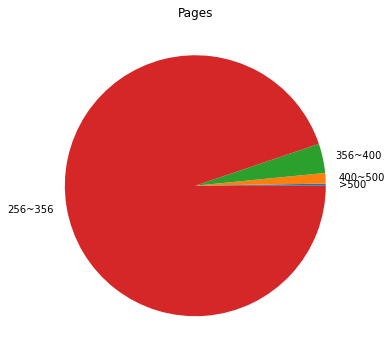

In [19]:
# 绘制饼图
plt.figure(figsize = (6, 6))

bi = [bi500, bi400, bi356, bi256]
plt.pie(bi, labels = ['>500', '400~500', '356~400', '256~356'])
plt.title("Pages")

plt.show()

In [20]:
NumSD = 0
for i in range(0, 831):
    for j in range(0, 57):
        for k in range(0, 500):
            if dataMagArray[i, j, k] > 356:
                NumSD += 1
print('Number of single data greater than 356:', NumSD)

Number of single data greater than 356: 109


In [21]:
for i in range(0, 831):
    for j in range(0, 57):
        for k in range(0, 500):
            if dataMagArray[i, j, k] > 356:
                dataMagArray[i, j, k] = 356

mi = ma = dataMagArray[0, 0, 0]
print(ma)

for i in range(0, 831):
    for j in range(0, 57):
        for k in range(0, 500):
            if dataMagArray[i, j, k] < mi:
                mi = dataMagArray[i, j, k]
            if dataMagArray[i, j, k] > ma:
                ma = dataMagArray[i, j, k]

print('min:', mi, '; max:', ma)

115.0043
min: 0.0 ; max: 356.0


In [22]:
pd.DataFrame(dataMag[0][:10,:13])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,115.0043,123.4382,115.5206,142.4675,197.4968,112.2185,109.3435,172.1046,105.0048,124.4267,147.5669,128.7245,119.1512
1,115.1217,121.0785,118.2074,146.6322,199.9225,118.0889,99.0051,165.7468,105.6030,124.8079,150.9603,118.3427,120.9669
2,118.3427,113.3181,123.7457,148.2228,199.6998,113.0398,99.8248,167.6305,107.4244,129.2478,154.4668,125.4193,123.4058
3,117.0684,109.5628,117.0043,145.0965,186.9679,110.3449,105.1713,161.1118,108.8118,125.9921,146.0856,123.9677,120.2082
4,119.0168,120.3079,124.4829,146.6970,187.6086,106.7052,107.8147,157.2005,109.6038,132.3707,153.6001,122.6418,122.2497
5,124.1934,125.2278,126.3962,147.1394,195.5633,110.1363,111.5437,163.6246,118.2286,136.4588,156.5184,130.6981,128.0156
6,149.5627,147.1768,153.2221,174.8657,216.0023,123.3694,133.4054,186.4001,136.7808,164.1250,181.1767,151.0132,151.2217
7,166.3731,165.2453,167.7260,191.2302,232.3812,140.5774,147.4924,204.5189,151.0132,182.5431,197.9520,166.5443,169.3665
8,173.7700,170.4699,175.0714,196.2371,228.1622,134.3317,154.8709,199.2486,158.7010,190.5886,204.9244,173.8994,174.0029
9,172.7339,165.6563,174.3474,190.8507,206.2062,122.2620,153.3101,192.6759,155.9295,186.7030,198.4364,170.6283,173.6692


In [23]:
print('Data shape:', dataMagArray.shape)
print('Label shape:', labelsArray.shape) 

Data shape: (831, 57, 500)
Label shape: (831, 1)


BP

In [24]:
# 先简单构建一个全连接神经网络

# 分离训练集与测试集
# 85%左右的数据用于训练
tmpTrain1 = list(dataMagArray[0:290,:,:])
tmpTrain2 = list(dataMagArray[341:478,:,:])
tmpTrain3 = list(dataMagArray[503:800,:,:])
tmpTest1 = list(dataMagArray[290:341,:,:])
tmpTest2 = list(dataMagArray[478:503,:,:])
tmpTest3 = list(dataMagArray[800:831,:,:])

trainMagBP = tmpTrain1
trainMagBP.extend(tmpTrain2)
trainMagBP.extend(tmpTrain3)
testMagBP = tmpTest1
testMagBP.extend(tmpTest2)
testMagBP.extend(tmpTest3)

print(len(trainMagBP), '+', len(testMagBP), '= 831')

724 + 107 = 831


In [25]:
# 给标签分组
tmpTrain1 = list(labelsArray[0:290])
tmpTrain2 = list(labelsArray[341:478])
tmpTrain3 = list(labelsArray[503:800])
tmpTest1 = list(labelsArray[290:341])
tmpTest2 = list(labelsArray[478:503])
tmpTest3 = list(labelsArray[800:831])

trainLableBP = tmpTrain1
trainLableBP.extend(tmpTrain2)
trainLableBP.extend(tmpTrain3)
testLableBP = tmpTest1
testLableBP.extend(tmpTest2)
testLableBP.extend(tmpTest3)
print(len(trainLableBP), '+', len(testLableBP), '= 831')

724 + 107 = 831


In [26]:
trainMagBP = np.array(trainMagBP)
testMagBP = np.array(testMagBP)
trainLableBP = np.array(trainLableBP)
testLableBP = np.array(testLableBP)

print('Training set data shape:', trainMagBP.shape)
print('Training set lable length:', len(trainLableBP))

Training set data shape: (724, 57, 500)
Training set lable length: 724


In [29]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(57*500,)))
network.add(layers.Dense(3, activation='softmax'))

In [30]:
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [31]:
trainMagBP = trainMagBP.reshape((724, 57*500))
trainMagBP = trainMagBP.astype('float32') / 356

testMagBP = testMagBP.reshape((107, 57*500))
testMagBP = testMagBP.astype('float32') / 356

In [33]:
from keras.utils import to_categorical

trainLableBP = to_categorical(trainLableBP)
testLableBP = to_categorical(testLableBP)

In [34]:
network.fit(trainMagBP, trainLableBP, epochs=5, batch_size=128)

Epoch 1/5
6/6 [==============================] - 1s 68ms/step - loss: 62.9291 - accuracy: 0.3964
Epoch 2/5
6/6 [==============================] - 0s 67ms/step - loss: 30.6587 - accuracy: 0.3633
Epoch 3/5
6/6 [==============================] - 0s 66ms/step - loss: 20.7438 - accuracy: 0.3633
Epoch 4/5
6/6 [==============================] - 0s 67ms/step - loss: 16.9076 - accuracy: 0.4392
Epoch 5/5
6/6 [==============================] - 0s 67ms/step - loss: 17.1930 - accuracy: 0.3439


In [35]:
test_loss, test_acc = network.evaluate(testMagBP, testLableBP)
print('Test Accuracy:', test_acc)

4/4 [==============================] - 0s 6ms/step - loss: 37.4739 - accuracy: 0.2897
Test Accuracy: 0.2897196114063263
